In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from scipy.special import erfinv, erfcinv
from scipy.stats import chi2
from scipy.stats import poisson

def get_significance(p_value):
    
    # probability of getting a more extreme result
    #p_value = 1. - chi2.cdf(chisquare, ndf)
    
    sigma = np.sqrt(2.) * erfcinv(p_value)
    
    #if printout: print(f"chi2/ndf: {chisquare}/{ndf}, p value: {p_value}, significance: {sigma} sigma")

    return sigma

In [3]:
with open('../TLee_Np0p/output_15_5_chi2s_spectra.txt', 'r') as f:
    lines = f.readlines()

data_15_5_chi2_value = -999
toy_1_1_15_5_chi2_values = []
toy_15_5_15_5_chi2_values = []

data_spectrum = []
toy_1_1_spectra = []
toy_15_5_spectra = []

curr_spectrum = []
for line in lines:

    if line[:20] == "data vs (15, 5) chi2":
        data_15_5_chi2_value = float(line.split()[-1])
        data_spectrum = curr_spectrum
        curr_spectrum = []

    elif line[:27] == "(1, 1) toy vs (15, 5), chi2":
        toy_1_1_15_5_chi2_values.append(float(line.split()[-1]))
        toy_1_1_spectra.append(curr_spectrum)
        curr_spectrum = []
    
    elif line[:28] == "(15, 5) toy vs (15, 5), chi2":
        toy_15_5_15_5_chi2_values.append(float(line.split()[-1]))
        toy_15_5_spectra.append(curr_spectrum)
        curr_spectrum = []

    elif line[:22] == "user_matrix_data entry":
        curr_spectrum.append(float(line.split()[-1]))


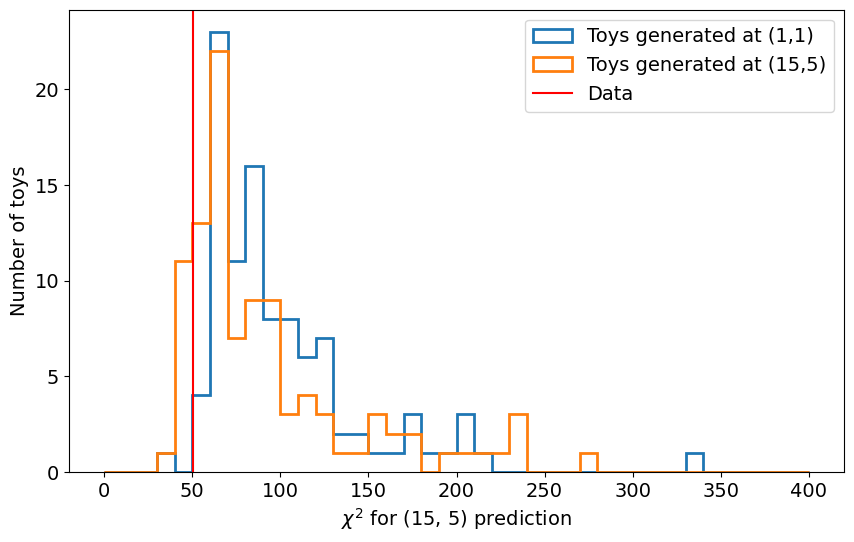

In [4]:
bins = np.linspace(0, 400, 41)

plt.rcParams.update({'font.size': 14})
lw = 2

plt.figure(figsize=(10, 6))

plt.hist(toy_1_1_15_5_chi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(toy_15_5_15_5_chi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(data_15_5_chi2_value, color='r', label='Data')

plt.legend()
plt.xlabel(r'$\chi^2$ for (15, 5) prediction')
plt.ylabel('Number of toys')

plt.show()


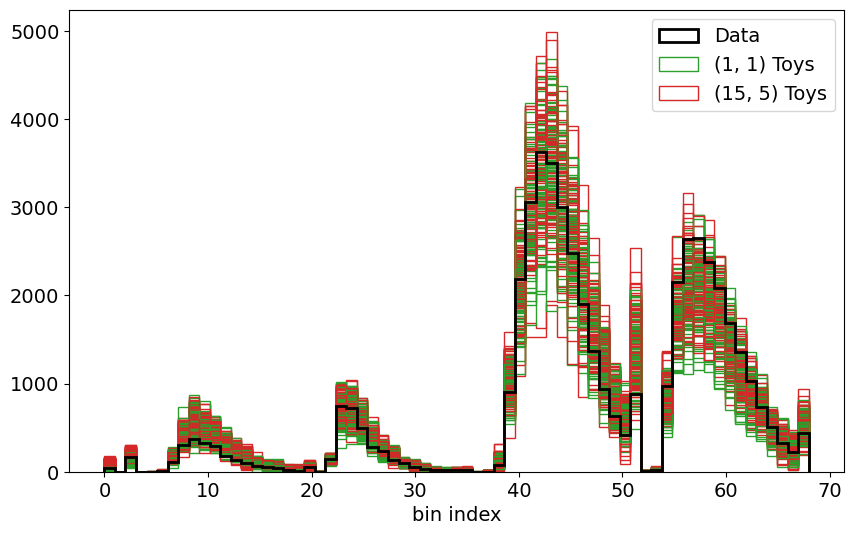

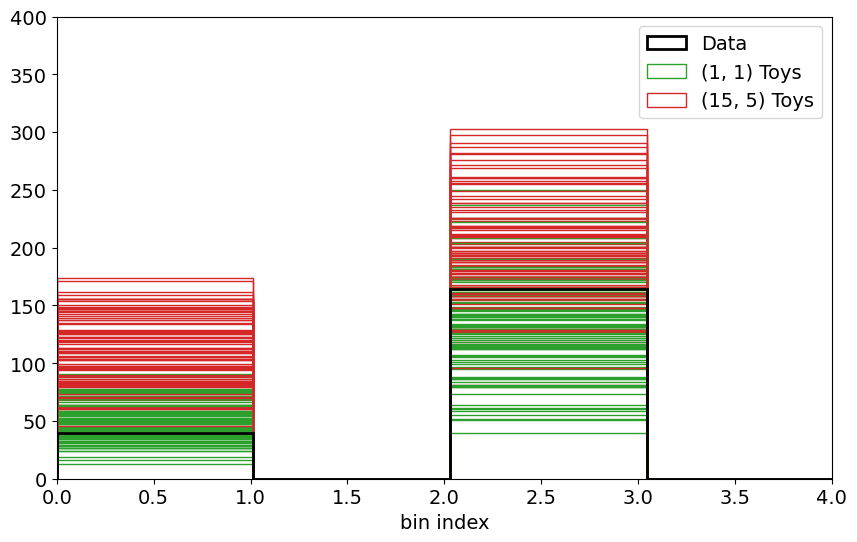

In [8]:
spectra_bins = np.linspace(0, 68, 68)
spectra_bin_centers = np.linspace(0.5, 67.5, 67+1)

num_display_toys = 100

plt.figure(figsize=(10, 6))
plt.hist(spectra_bin_centers, weights=data_spectrum, bins=spectra_bins, histtype='step', lw=lw, color="k", label='Data', zorder=10)
for uni_i in range(num_display_toys):
    if uni_i == 0:
        plt.hist(spectra_bin_centers, weights=toy_1_1_spectra[uni_i], bins=spectra_bins, histtype='step', lw=1, color="tab:green", label=f'(1, 1) Toys')
        plt.hist(spectra_bin_centers, weights=toy_15_5_spectra[uni_i], bins=spectra_bins, histtype='step', lw=1, color="tab:red", label=f'(15, 5) Toys')
    plt.hist(spectra_bin_centers, weights=toy_1_1_spectra[uni_i], bins=spectra_bins, histtype='step', color="tab:green", lw=1)
    plt.hist(spectra_bin_centers, weights=toy_15_5_spectra[uni_i], bins=spectra_bins, histtype='step', color="tab:red", lw=1)
plt.legend()
plt.xlabel("bin index")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(spectra_bin_centers, weights=data_spectrum, bins=spectra_bins, histtype='step', lw=lw, color="k", label='Data', zorder=10)
for uni_i in range(num_display_toys):
    if uni_i == 0:
        plt.hist(spectra_bin_centers, weights=toy_1_1_spectra[uni_i], bins=spectra_bins, histtype='step', lw=1, color="tab:green", label=f'(1, 1) Toys')
        plt.hist(spectra_bin_centers, weights=toy_15_5_spectra[uni_i], bins=spectra_bins, histtype='step', lw=1, color="tab:red", label=f'(15, 5) Toys')
    plt.hist(spectra_bin_centers, weights=toy_1_1_spectra[uni_i], bins=spectra_bins, histtype='step', color="tab:green", lw=1)
    plt.hist(spectra_bin_centers, weights=toy_15_5_spectra[uni_i], bins=spectra_bins, histtype='step', color="tab:red", lw=1)
plt.legend()
plt.xlabel("bin index")
plt.xlim(0, 4)
plt.ylim(0, 400)
plt.show()


In [6]:
"""with open('../TLee_Np0p/chi2_values_15_5.txt', 'r') as f:
    lines = f.readlines()

data_15_5_chi2_value = -999
toy_1_1_15_5_chi2_values = []
toy_15_5_15_5_chi2_values = []
for line in lines:
    if line[:4] == "data":
        data_15_5_chi2_value = float(line.split()[-1])
    elif line[:6] == "(1, 1)":
        toy_1_1_15_5_chi2_values.append(float(line.split()[-1]))
    elif line[:7] == "(15, 5)":
        toy_15_5_15_5_chi2_values.append(float(line.split()[-1]))

num_toys_1_1_15_5 = len(toy_1_1_15_5_chi2_values)
num_toys_1_1_15_5_less_than_data = len([x for x in toy_1_1_15_5_chi2_values if x < data_15_5_chi2_value])
num_toys_1_1_15_5_greater_than_data = len([x for x in toy_1_1_15_5_chi2_values if x > data_15_5_chi2_value])

num_toys_15_5_15_5 = len(toy_15_5_15_5_chi2_values)
num_toys_15_5_15_5_less_than_data = len([x for x in toy_15_5_15_5_chi2_values if x < data_15_5_chi2_value])
num_toys_15_5_15_5_greater_than_data = len([x for x in toy_15_5_15_5_chi2_values if x > data_15_5_chi2_value])
"""

'with open(\'../TLee_Np0p/chi2_values_15_5.txt\', \'r\') as f:\n    lines = f.readlines()\n\ndata_15_5_chi2_value = -999\ntoy_1_1_15_5_chi2_values = []\ntoy_15_5_15_5_chi2_values = []\nfor line in lines:\n    if line[:4] == "data":\n        data_15_5_chi2_value = float(line.split()[-1])\n    elif line[:6] == "(1, 1)":\n        toy_1_1_15_5_chi2_values.append(float(line.split()[-1]))\n    elif line[:7] == "(15, 5)":\n        toy_15_5_15_5_chi2_values.append(float(line.split()[-1]))\n\nnum_toys_1_1_15_5 = len(toy_1_1_15_5_chi2_values)\nnum_toys_1_1_15_5_less_than_data = len([x for x in toy_1_1_15_5_chi2_values if x < data_15_5_chi2_value])\nnum_toys_1_1_15_5_greater_than_data = len([x for x in toy_1_1_15_5_chi2_values if x > data_15_5_chi2_value])\n\nnum_toys_15_5_15_5 = len(toy_15_5_15_5_chi2_values)\nnum_toys_15_5_15_5_less_than_data = len([x for x in toy_15_5_15_5_chi2_values if x < data_15_5_chi2_value])\nnum_toys_15_5_15_5_greater_than_data = len([x for x in toy_15_5_15_5_chi2_value